In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
X,y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(1437, 64)

In [9]:
X_test.shape

(360, 64)

In [11]:
X_train2 = X_train.copy()
X_train2.shape  ### Creating a seperate dataset to test the effects of standardization

(1437, 64)

In [14]:
X_train[:2]

array([[ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.]])

In [15]:
X_train2[:2]

array([[ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.]])

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
model1 = LogisticRegression(solver = "liblinear", C=0.05, multi_class="ovr", random_state=0)
model1.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
model2= LogisticRegression(solver="liblinear", C=0.05, multi_class="ovr", random_state=0)
model2.fit(X_train2,y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import log_loss
def deviance(X, y, model):
    return 2*log_loss(y, model.predict_proba(X), normalize=False)

### Defining a function to find the residual deviance of the models

In [27]:
rd1 = deviance(X_train, y_train, model1)    ### Calculating residual deviance of the models
rd2 = deviance(X_train2, y_train, model2)
print(rd1,rd2)

1608.5882504992803 260.58006724466316


In [28]:
X_test2 = X_test.copy()

In [30]:
X_test = scaler.fit_transform(X_test)

In [31]:
y_pred = model1.predict(X_test)

In [32]:
y_pred2 = model2.predict(X_test2)  ### Defining 2 different predictions for non standardized and standardized data

In [34]:
model1.score(X_train, y_train)

0.964509394572025

In [35]:
model1.score(X_test, y_test)

0.95

In [36]:
model2.score(X_train2, y_train)    

0.9874739039665971

In [37]:
model2.score(X_test2, y_test)   ### The non standardized data seems to perform marginally better than the standardized data

0.9583333333333334

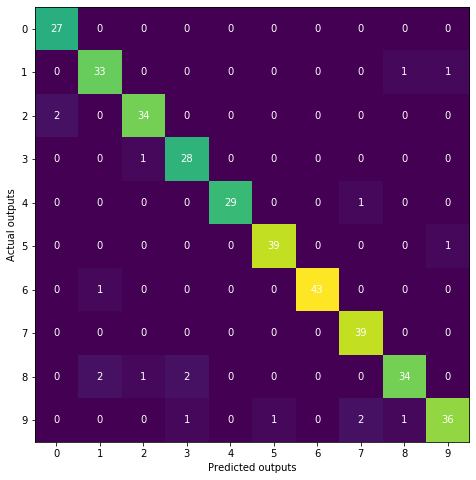

In [39]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')



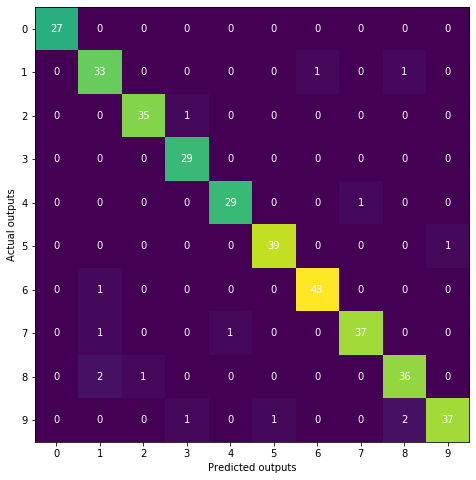

In [40]:
cm = confusion_matrix(y_test, y_pred2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')